In [9]:
# python libraries
import sys
from typing import List,Tuple
sys.path.append("c:\\Users\\Lenovo\\DataspellProjects\\PyTorch2")

# torch
import torch 
from torch import nn
from torchvision import (
    transforms,
    datasets
    )
from torch.utils.data import DataLoader
try:
    from torchmetrics import Accuracy
except:
    %pip install torchmetrics
    from torchmetrics import Accuracy

# helper function
try:
    import helper
except:
    import requests
    response = requests.get("https://raw.githubusercontent.com/Lashi0812/PyTorch2/master/helper.py")
    with open("helper.py","wb") as f:
        f.write(response.content)


# FashionMNIST data

In [10]:
class FashionMNIST(helper.DataModule):
    def __init__(self, batch_size: int = 64, resize=(28, 28)) -> None:
        super().__init__()
        self.batch_size = batch_size
        self.resize = resize

        transform = transforms.Compose(
            [transforms.Resize(resize), transforms.ToTensor()]
        )

        self.train = datasets.FashionMNIST(
            root=self.root, train=True, transform=transform
        )
        self.val = datasets.FashionMNIST(
            root=self.root, train=False, transform=transform
        )
        self.classes = self.train.classes
        self.class_to_idx = self.train.class_to_idx

    def text_labels(self, indices: List):
        return [self.classes[a] for a in indices]

    def get_dataloader(self, train: bool):
        data = self.train if train else self.val
        return DataLoader(
            dataset=data,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=train,
        )
    
    def visualize(self,batch:Tuple,num_rows=1,num_cols=8):
        X,y = batch
        labels = self.text_labels(y)
        helper.show_images(X.squeeze(1),num_rows=num_rows,num_cols=num_cols,titles=labels)

# Implementing from Scratch

In [17]:
class MLPScratch(helper.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01) -> None:
        super().__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.num_hiddens = num_hiddens
        self.lr = lr
        self.sigma = sigma

        self.W1 = nn.Parameter(torch.randn(self.num_inputs, self.num_hiddens) * self.sigma)
        self.b1 = nn.Parameter(torch.zeros(self.num_hiddens))
        self.W2 = nn.Parameter(torch.randn(self.num_hiddens, self.num_outputs) * self.sigma)
        self.b2 = nn.Parameter(torch.zeros(self.num_outputs))

    def relu(self, x):
        a = torch.zeros_like(x)
        return torch.max(x, a)

    def forward(self, x: torch.Tensor):
        # flatten
        x = x.reshape((-1, self.num_inputs))
        H = self.relu(torch.matmul(x, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2


# Training the model

Running the model in cpu


  0%|          | 0/3 [00:00<?, ?it/s]

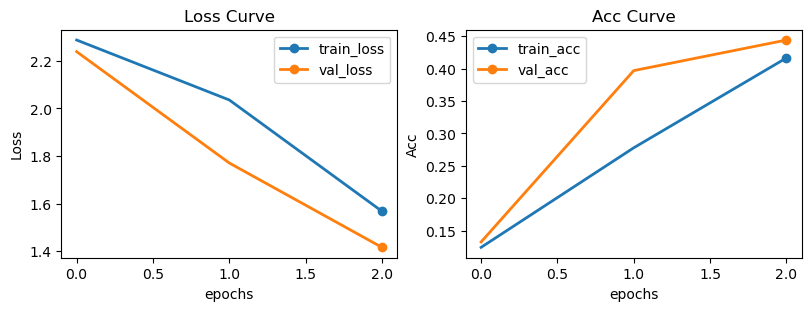

In [18]:
data = FashionMNIST(batch_size=256)
model = MLPScratch(num_inputs=28*28,num_hiddens=10,num_outputs=10,lr=0.01)
trainer = helper.Trainer(max_epochs=3)
trainer.fit(model,data)